In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt


df = pd.read_csv('feedback.csv')

In [46]:
df

,ID,Location,Track,Week,Rating,Pacing
0,134,San Francisco,"Apps, Explorer",Week 1,3,Just right
1,36,Los Angeles,Apps,Week 1,4,A little too fast
2,117,San Francisco,Games,Week 1,4,Way too slow
4,350,New York City,"Apps, Explorer",Week 1,4,Just right
5,23,Redwood City,Apps,Week 1,5,Just right
...,...,...,...,...,...,...
1448,1495,New York City,"Apps, Explorer",Week 7,10,Just right
1449,1496,New York City,"Apps, Explorer",Week 7,8,Just right
1450,1497,New York City,Apps,Week 7,10,Just right
1451,1498,New York City,"Apps, Explorer",Week 7,1,A little too slow


In [31]:
pd.options.mode.chained_assignment = None
df.columns = ['ID', 'Location', 'Track', 'Week', 'Rating', 'Pacing']
df['Rating'] = df['Rating'][df['Rating']!='#ERROR!']
df['Rating'].value_counts()

8     392
9     384
10    376
7     177
6      59
5      35
4      13
3       8
1       2
0       2
2       2
Name: Rating, dtype: int64

# Question 1: How do the student's ratings change over the length of the course?

In [32]:
df = df.dropna()
df['Rating'] = df['Rating'].astype(int)
pd.crosstab(df['Week'], df['Rating'])

Rating,0,1,2,3,4,5,6,7,8,9,10
Week,,,,,,,,,,,
Week 1,0,0,0,1,6,9,10,39,89,56,66
Week 2,0,0,0,2,0,6,11,31,80,74,57
Week 3,0,1,0,1,0,4,13,19,63,69,63
Week 4,0,0,0,2,3,6,8,23,49,55,43
Week 5,1,0,1,0,2,3,7,22,45,44,51
Week 6,0,0,1,1,0,1,5,18,41,34,42
Week 7,0,1,0,1,0,4,2,14,19,41,37
Week 8,0,0,0,0,0,0,0,1,1,3,4


In [44]:
total = 0
total_list = []
def get_sums():
    for i in range(1, len(df['Week'].value_counts()) + 1):
        total = 0
        for j in range(0, len(df['Rating'].value_counts())):
            total += j * len(df[(df['Week'] == f'Week {i}') & (df['Rating'] == j)])
        total_list.append(round(total/len(df[df['Week'] == f'Week {i}']),3))
    return total_list
        
ratings = get_sums()
weeks = ['Week 1', 'Week 2', 'Week 3', 'Week 4', 'Week 5', 'Week 6', 'Week 7', 'Week 8']

## Although there is a trend upwards in the graph, the last week is an outlier with the small amount of people who filled out a response. Overall the ratings stayed consistent throughout the courses.

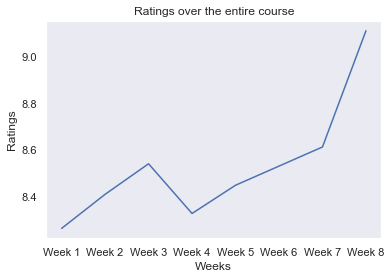

In [45]:
fig, ax = plt.subplots()
ax.plot(weeks, ratings)

ax.set(xlabel='Weeks', ylabel='Ratings',
       title='Ratings over the entire course')
ax.grid()
plt.show()

# Question 2: What is the breakdown of where students are from, and from that, which track is the most popular from the top location compared to the rest of the students.

In [48]:
df['Location'].value_counts()

San Francisco    360
New York City    330
Santa Clara      201
Los Angeles      106
Beijing           78
Chicago           70
Tokyo             65
Redwood City      58
Washington DC     47
Oakland           47
Atlanta           33
Hong Kong         11
Name: Location, dtype: int64

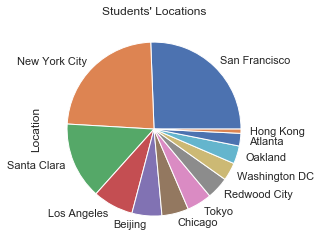

In [57]:
df['Location'].value_counts().plot(kind='pie', title="Students' Locations")

In [149]:
df[df['Location'] == 'San Francisco']['Track'].value_counts()

Apps              155
Apps, Explorer     77
Games              68
VR                 60
Name: Track, dtype: int64

In [150]:
df['Track'].value_counts()

Apps               871
Apps, Explorer     224
Games              208
VR                  60
Games, Explorer     43
Name: Track, dtype: int64

## Out of all the cities, San Francisco is the one on top. The top track picked by students from SF is Apps, same trend for the rest of Students at Make School.

# Q3: In the top track category [Apps], what were the student's thoughts on the pacing of the courses?